CONVOLUTIONAL FILTERS AND EDGE DETECTORS

By Chetna Agarwal

###FOURIER TRANSFORM

In [ ]:
# Frequency components of an imnage can be displayed after doing a fourier tranform. An FT looks at the components of the image (edges that are high frequency; 
# and areas of smooth colour as low frequency) and plots the frequencies that occur as  points on spectrum.
# in fact, an FT treats patterns of intensity in an image as sine waves with a particular frequency. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

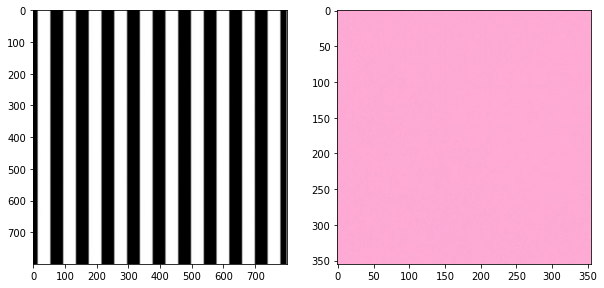

In [ ]:
# read in images
image_stripes = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/2. Convolutional Features Edge Detection/images/stripes.jpg')
image_solid = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/2. Convolutional Features Edge Detection/images/pink_solid.jpg')
# change color to RGB (from BGR)
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

# display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.imshow(image_stripes)
ax2.imshow(image_solid)

In [ ]:
# convert to grayscale to focus on the intensity patterns in the image
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2GRAY)

In [ ]:
# normalize the image color values from a range of [0, 255] to [0,1] for further processing
norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

In [ ]:
# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
  ''' This function takes in a normalized, grayscale image and returns a frequency spectrum
  transform of that image'''
  f = np.fft.fft2(norm_image)
  fshift = np.fft.fftshift(f)
  frequency_tx = 20 * np.log(np.abs(fshift))
  return frequency_tx

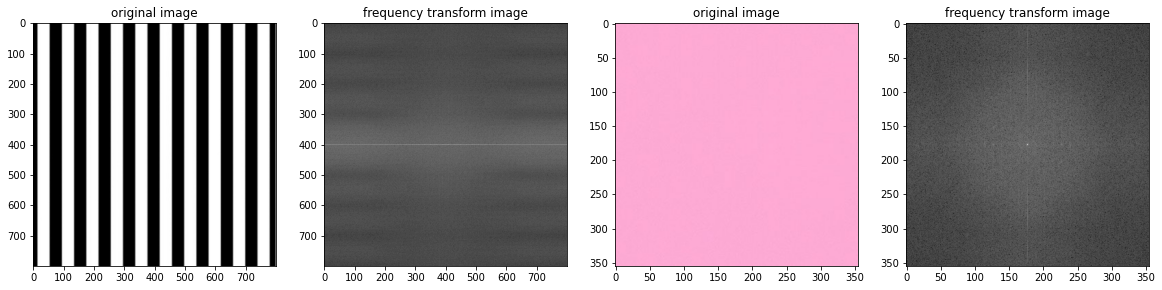

In [ ]:
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
ax1.set_title('original image')
ax1.imshow(image_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image_solid)
ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap='gray')

In [ ]:
# Low frequencies are at the center of the frequency transform image.
# The transform images for these examples show that the solid images has the most low frequency components (as seen by center bright spot). 
# The stripes transform image contains low frequencies for the areas of black and white and high frequencies for the edges in between those colours. The stripes transform image also 
# tells us that there is one dominating direction for these frequencies; vertical stripes are represented by horizontal lines passing through the center of the frequnecy transform image.

In [ ]:
# Frequency transform for real world images

In [ ]:
image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/2. Convolutional Features Edge Detection/images/birds.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

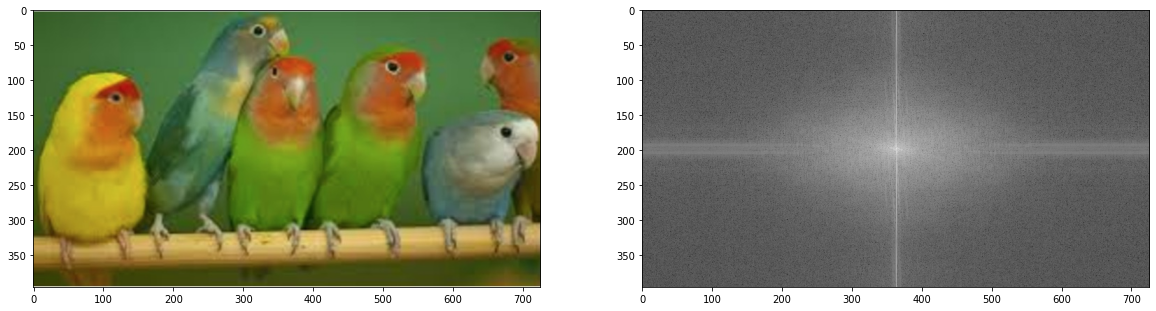

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
norm_image = gray/255.0
f_image = ft_image(norm_image)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(image)
ax2.imshow(f_image, cmap = 'gray')

In [ ]:
# Observation : The image has components of all frequencies. The bright spot in the center of the transform image tells us that a large portion of the
# image is low frequency; this makes sense since the body of birds and the background are solid in color. The tranform image tells us that there are two 
# dominating directions for these frequencies; vertical edges(from the edges of the birds) are represented by horizontal lines passing through the center 
# and horizontal edges (from the edges and tops of birds heads) are represented by vertical lines passing through the center.

###FINDING THE EDGES AND CUSTOM KERNELS

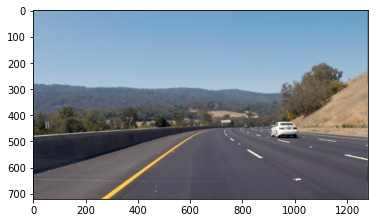

In [ ]:
image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/2. Convolutional Features Edge Detection/images/curved_lane.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

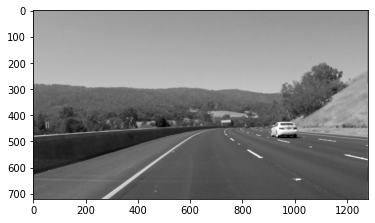

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

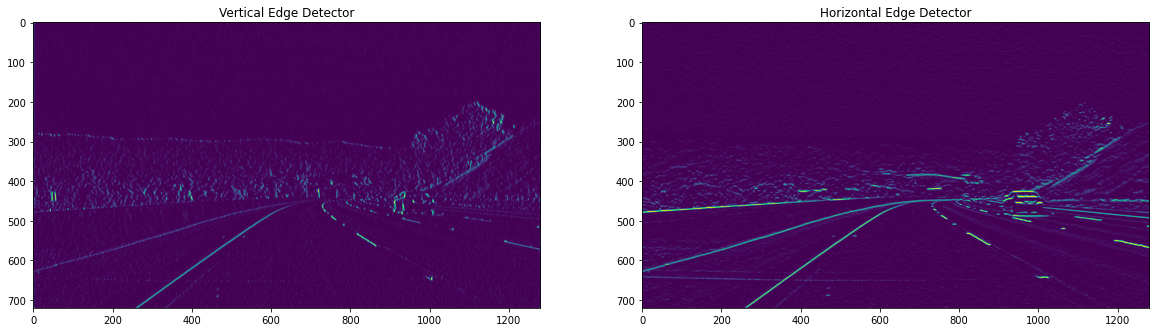

In [ ]:
# create a custom kernel
# Sobel filter -> very common filter used for edge detection - to find patterns of intensity in an image. Applying a sobel filter is a way of taking an approximation of the derivative of the
# image in the x and y direction, separately. 

sobel_y = np.array([[-1, -2, -1],
                    [0,0,0],
                    [1, 2, 1]])
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0 , 2],
                   [-1, 0, 1]])
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.set_title('Vertical Edge Detector')
ax1.imshow(filtered_image_x)
ax2.set_title('Horizontal Edge Detector')
ax2.imshow(filtered_image_y)

###GAUSSIAN BLUR

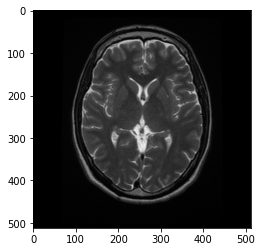

In [ ]:
image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/2. Convolutional Features Edge Detection/images/brain_MR.jpg')
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

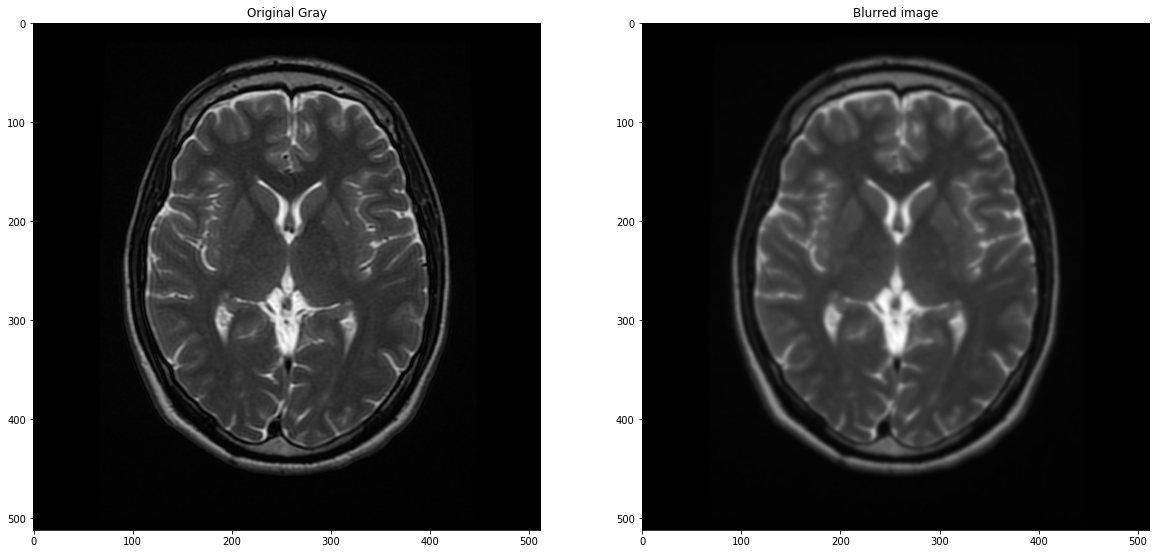

In [ ]:
# Gaussian Blur the image
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.set_title('Original Gray')
ax1.imshow(gray, cmap = 'gray')

ax2.set_title('Blurred image')
ax2.imshow(gray_blur, cmap = 'gray')


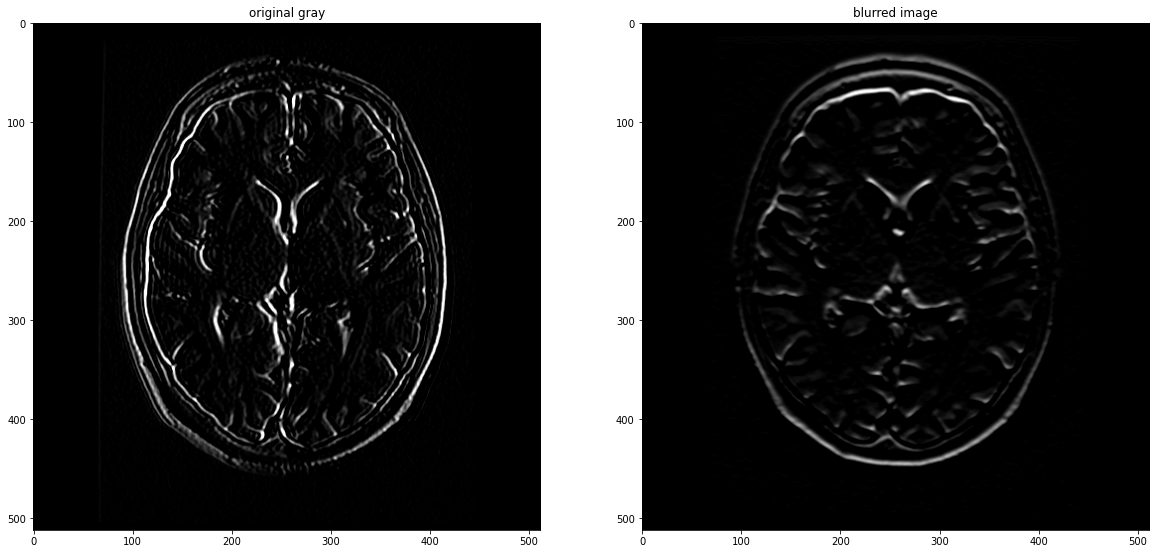

In [ ]:
# test performance with a high pass filter

# High pass filter - 3X3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
            [0, 0 , 0],
            [1, 2, 1]])
# filter the original and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)
filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

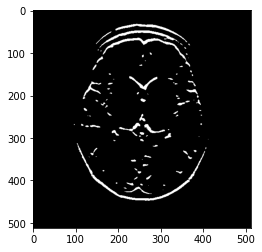

In [ ]:
# create a threshold that sets all the filtered pixels to white 
# above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap = 'gray')

FOURIER TRANSFORM OF FILTERS

In [ ]:
# high and Low pass filters
# why is a sobel filter high pass and Gaussian filter low pass?
# We can actually visualize the frequencies that these filters block out by taking a 
# look at their FTs. The frequency components of an image can be displayed 
# after doing a Fourier transform. An FT can look at the components of an image
# (edges that are high frequency, and areas of smooth color as low frequency), 
# and plot the frequencies that occur as plots in the spectrum. 

# lets treat our filters as small images and display them in the frequency domain.

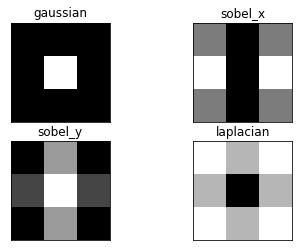

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

gaussian = (1/9) * np.array([[1, 1, 1],
                             [1, 1, 1],
                             [1, 1, 1]])
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [-1, -2, -1]])
laplacian = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])
filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# Areas of white or gray light allow that part of the frequency spectrum through.
# Areas of black mean that pat of the spectrum is blocked out of the image.
# Low frequencies are at the center of the freq transform image, and high frequencies 
# are at the edges. Gaussian filters allow only low pass frequencies through, 
# which is at the center of the freq transform image. The sobel filters block out 
# frequencies of a certain orientation and a laplace filter(detects edges 
# regardless of orientation) should block out low frequencies.

CANNY EDGE DETECTION

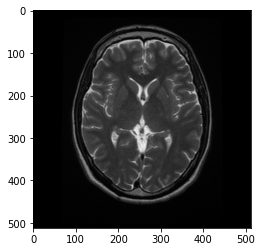

In [ ]:
image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/2. Convolutional Features Edge Detection/images/brain_MR.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

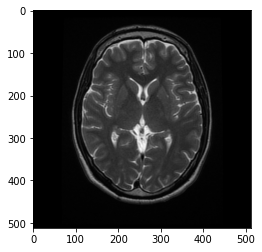

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

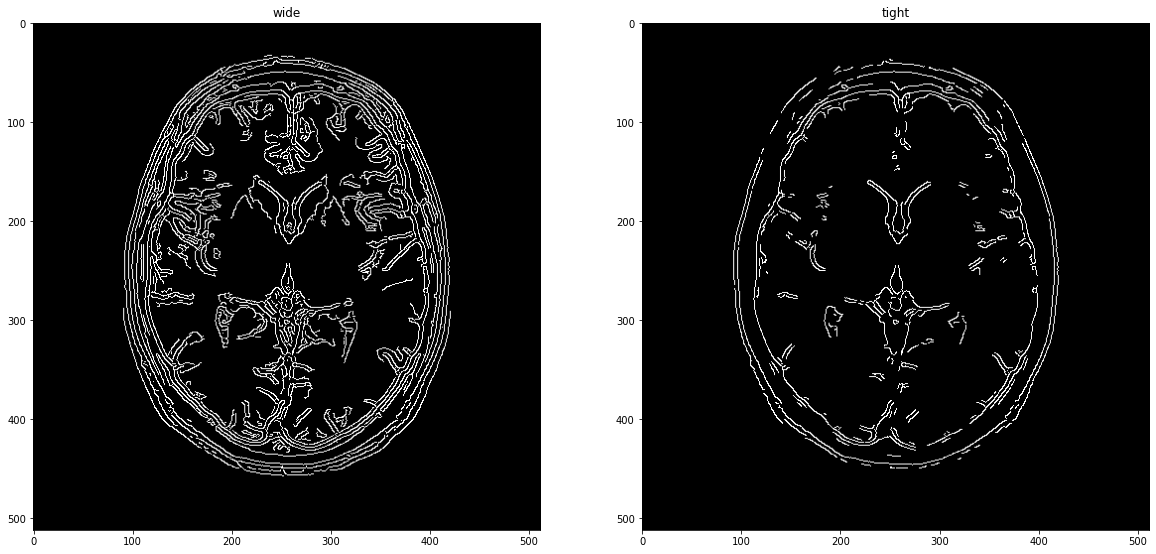

In [ ]:
# implement canny edge detection
wide = cv2.Canny(gray, 30, 100) # arg2 - minVal, agr3 - maxval
tight = cv2.Canny(gray, 200, 240)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

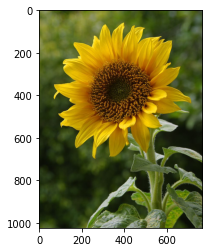

In [ ]:
image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/2. Convolutional Features Edge Detection/images/sunflower.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

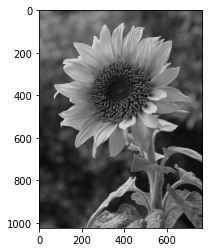

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap = 'gray')

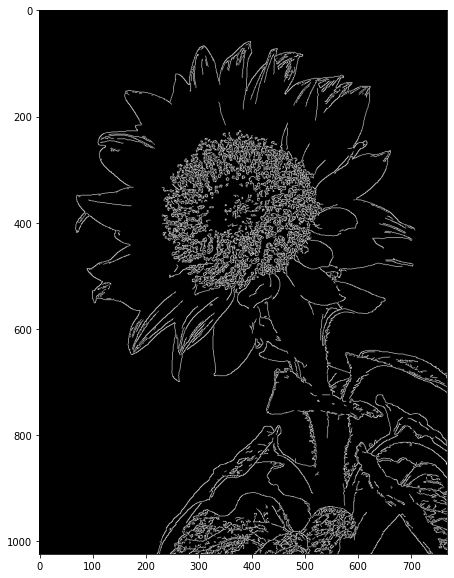

In [ ]:
# Define lower and upper threshold for hysteresis 

# eg - if threshold is small and low, will pick up a lot of noise :-
lower = 120
upper = 240

edges = cv2.Canny(image, lower, upper)
plt.figure(figsize = (20, 10))
plt.imshow(edges, cmap = 'gray')

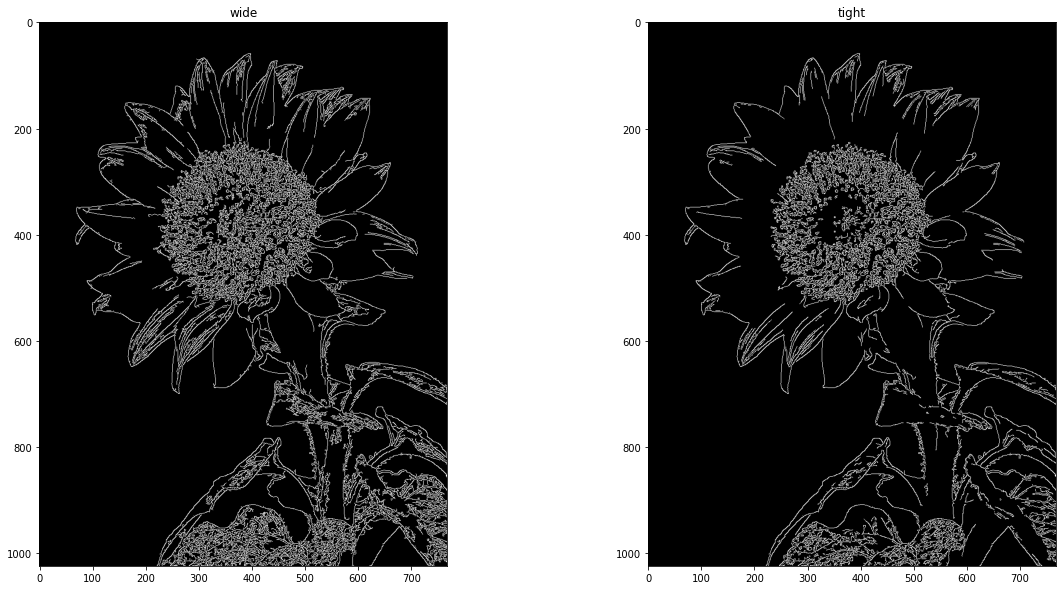

In [ ]:
# try canny using wide and tight thresholds
wide = cv2.Canny(image, 30, 240)
tight = cv2.Canny(image, 100, 240)

# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

HOUGH TRANSFORM

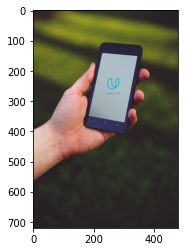

In [ ]:
# HOUGH LINES
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/2. Convolutional Features Edge Detection/images/phone.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

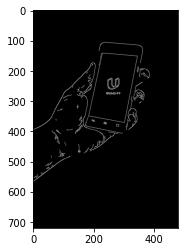

In [ ]:
# Perform edge detection
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# define paremeters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap = 'gray')

In [ ]:
# Find lines using Hough transform - define hough trasform parameters 
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5

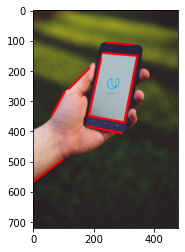

In [ ]:
line_image = np.copy(image) # create a copy of image to draw lines on

# run hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# iterate over output lines and draw lines on output image
for line in lines:
  #print(line)
  for x1, y1, x2, y2 in line:
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)
plt.imshow(line_image)

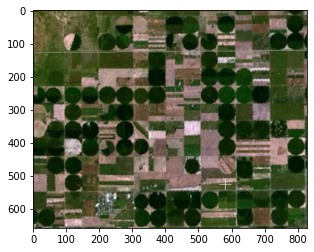

In [ ]:
# HOUGH CIRCLE DETECTION

image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/2. Convolutional Features Edge Detection/images/round_farms.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

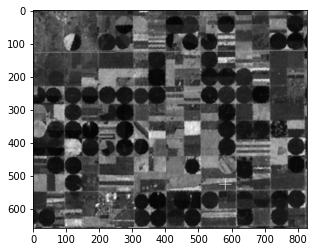

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)
plt.imshow(gray_blur, cmap = 'gray')

In [ ]:
# Houghcircles function

# ARGUMENTS :-
# 1. an input image, detection method (Hough Gradient), resolution factor between 
# the detection and image
# 2. minDist - the minimum distance between circles
# 3. param1 - the higher value for performing canny edge detection
# 4. param2 - threshold for circle detection, a smaller value-->more circles will be detected
# min/max radius for detected circles

# The variables we should change are the last 2 : min/max radius detected circles. 
# Take a look at the image and estimate how many pisxels the avg circlke is in diameter
# Use this estimate to provide values for min/max arguments. 

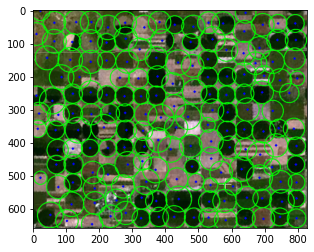

In [ ]:
# for drawing circles on
circles_im = np.copy(image)

circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=45,
                           param1=70,
                           param2=11,
                           minRadius=20,
                           maxRadius=40)

# convert circles into expected type
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

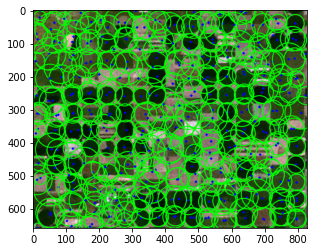

In [ ]:
# try changing minRadius and maxRadius
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=45,
                           param1=70,
                           param2=11,
                           minRadius=10,
                           maxRadius=50)

# convert circles into expected type
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

In [ ]:
circles.shape

(1, 165, 3)

FACE DETECTION USING OPENCV

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

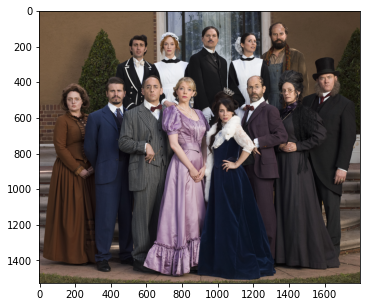

In [ ]:

# load in color image for face detection
image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/2. Convolutional Features Edge Detection/images/multi_faces.jpg')

# convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.imshow(image)

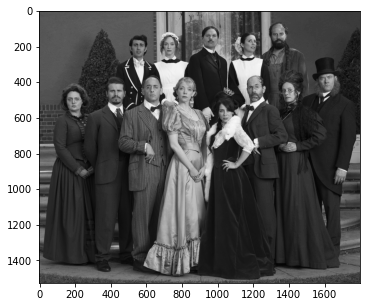

In [ ]:
# to use face detector, first convert image from color to grayscale. For face detection,
# this is perfectly fine since there is plenty non colour specific structure in the human
# face for our detector to learn.

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10, 5))
plt.imshow(gray, cmap = 'gray')

In [ ]:
# Next load in the fully trained architecture of the face detector (haarcascade)
# and use it on image to find faces.

# How many faces are detected is determined by the function detectMultiScale
# which aims to detect faces of varying sizes. 
# The inputs to this function are: (image, scaleFactor, minNeighbors); we
# often detect more faces with a smaller scaleFactor, and lower value for 
# minNeighbors, but raising these values often produces better matches. 
# Modify these values depending on the input image.

# load in cascade classifier
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/CV ND /1. Intro to CV/2. Convolutional Features Edge Detection/detector_architectures/haarcascade_frontalface_default.xml')

# run the detector on the grayscale image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# the output of this classifier is an array of detections; coordinates that define
# dimensions of bounding box that is square in dimension.

# print the detections found
# print out the detections found
print ('We found ' + str(len(faces)) + ' faces in this image')
print ("Their coordinates and lengths/widths are as follows")
print ('=============================')
print (faces)

We found 13 faces in this image
Their coordinates and lengths/widths are as follows
[[1295   94   96   96]
 [ 917  102   96   96]
 [1565  339   96   96]
 [1148  131   96   96]
 [ 683  149   96   96]
 [ 510  158   96   96]
 [ 996  526   96   96]
 [ 588  390   96   96]
 [1157  391   96   96]
 [ 771  405   96   96]
 [ 383  414   96   96]
 [1345  411   96   96]
 [ 146  458   96   96]]


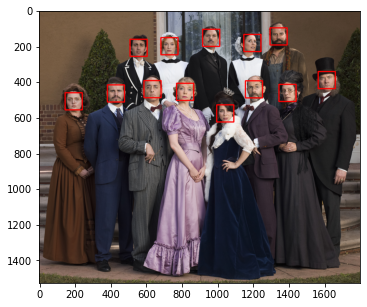

In [ ]:
# PLOT THE DETECTION BOXES

img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.  
    # the fourth element (255,0,0) determines the color of the rectangle, 
    # and the final argument (here set to 5) determines the width of the drawn rectangle
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)  

# display the result
plt.figure(figsize=(10,5))
plt.imshow(img_with_detections)